<a href="https://colab.research.google.com/github/bhrigu2000y/AI_agent_comp_researcher/blob/main/fcc_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df= pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
import os

# List files in the root of MyDrive
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    print(root)
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

In [4]:
df["class"]= (df["class"] =="g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


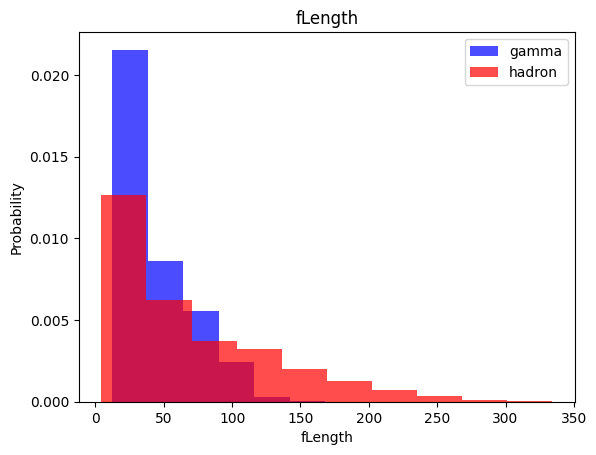

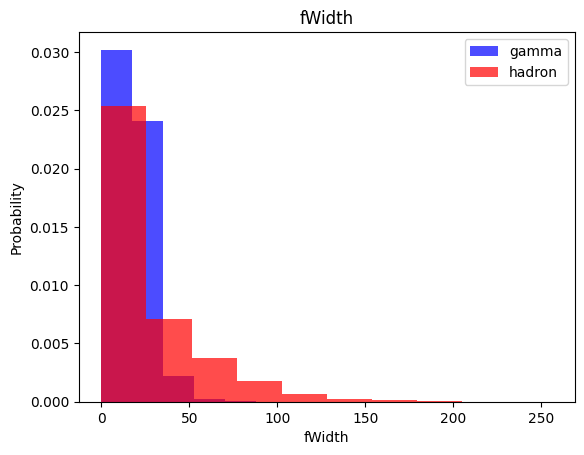

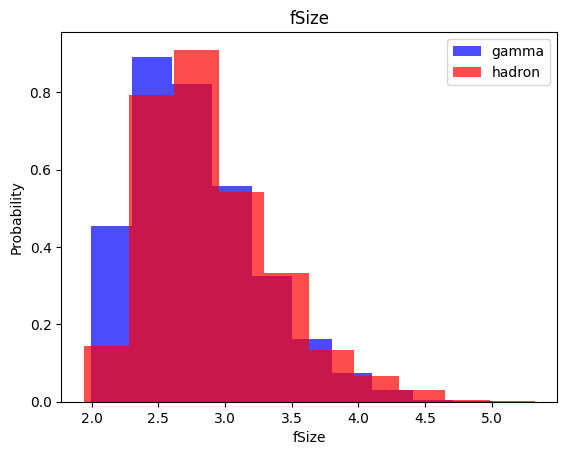

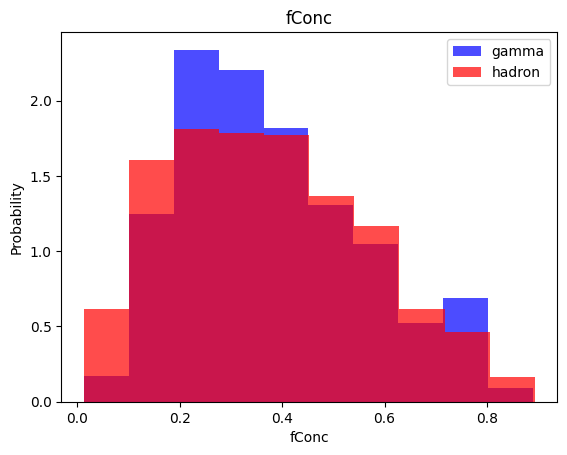

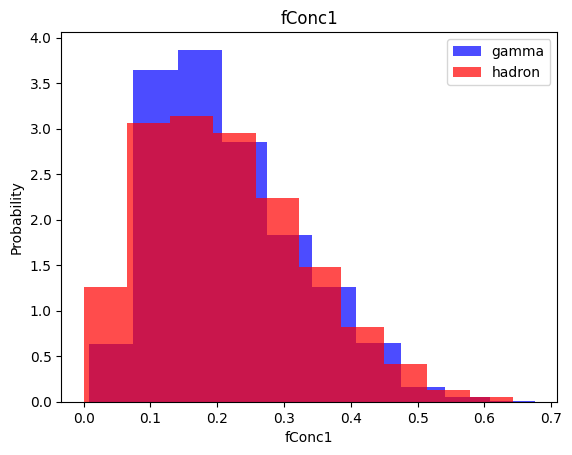

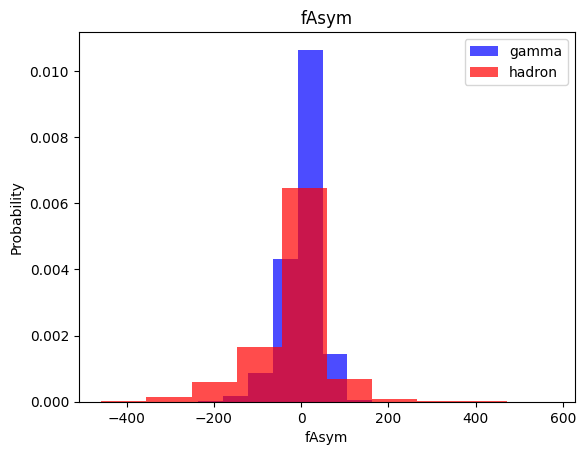

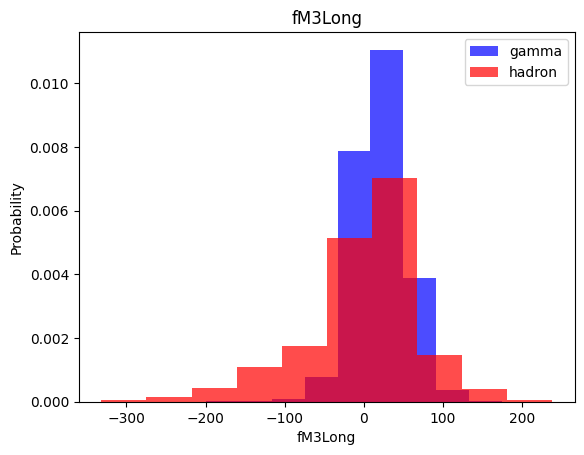

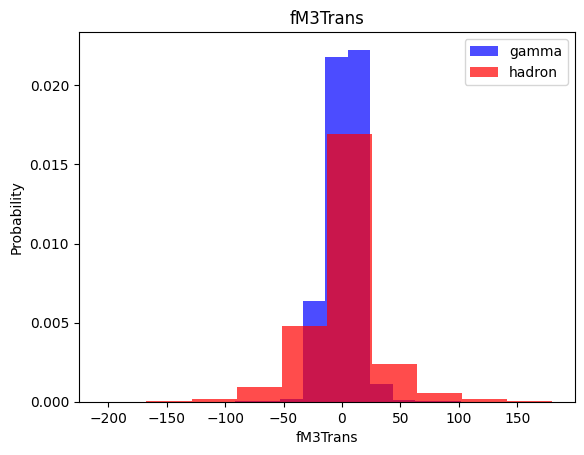

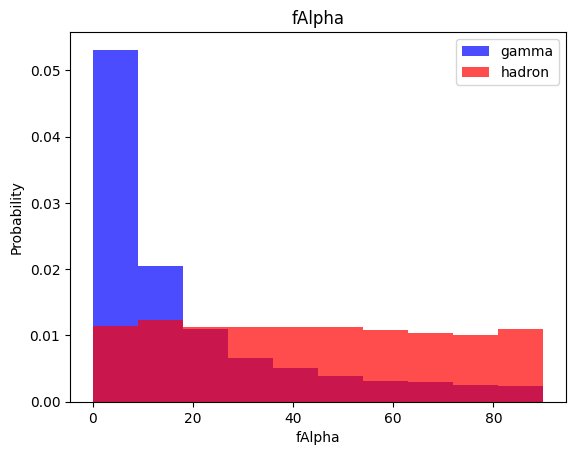

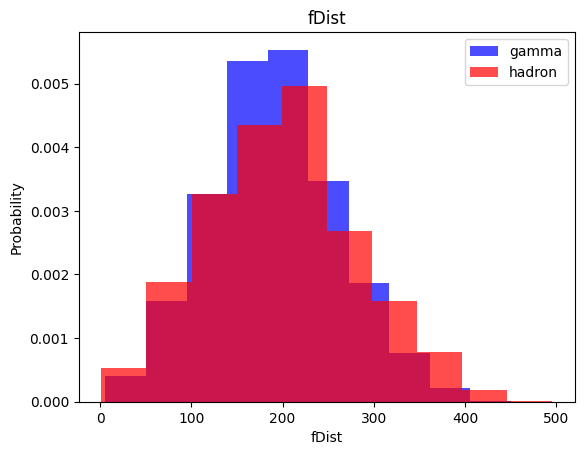

In [6]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation and test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample=False):
  x= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    smote = BorderlineSMOTE()
    x,y = smote.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [9]:
train, x_train, y_train = scale_dataset(train,oversample=True)
valid, x_valid, y_valid = scale_dataset(valid,oversample=False)
test, x_test, y_test = scale_dataset(test,oversample=False)

In [10]:
len(y_train)

14700

#KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_code = KNeighborsClassifier(n_neighbors=5)
knn_code = knn_code.fit(x_train,y_train)

In [13]:
y_pred = knn_code.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1313
           1       0.87      0.79      0.83      2491

    accuracy                           0.79      3804
   macro avg       0.77      0.79      0.77      3804
weighted avg       0.80      0.79      0.79      3804



#Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.55      1313
           1       0.76      0.85      0.80      2491

    accuracy                           0.73      3804
   macro avg       0.70      0.67      0.68      3804
weighted avg       0.72      0.73      0.72      3804



#Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = LR_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1313
           1       0.86      0.78      0.82      2491

    accuracy                           0.77      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.77      0.78      3804



#SVM

In [21]:
from sklearn.svm import SVC

In [22]:
SVM_model = SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [23]:
y_pred = SVM_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1313
           1       0.92      0.82      0.87      2491

    accuracy                           0.83      3804
   macro avg       0.82      0.84      0.82      3804
weighted avg       0.85      0.83      0.84      3804



#Neural Network

In [24]:
import tensorflow as tf

In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [26]:
def train_model(train, valid, test, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

  nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs,
                       batch_size = 32, validation_split = 0.2, verbose = 0,
                       validation_data=(x_valid, y_valid))
  return nn_model, history

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


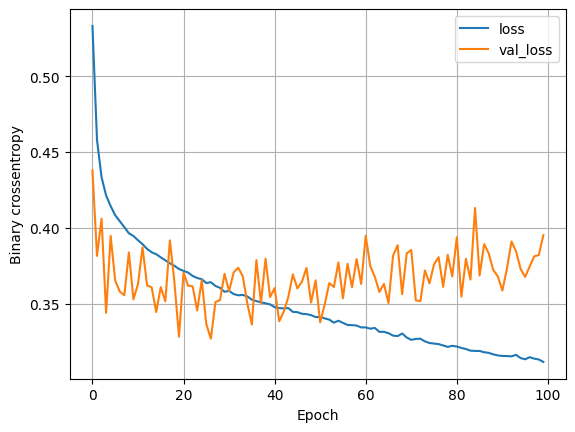

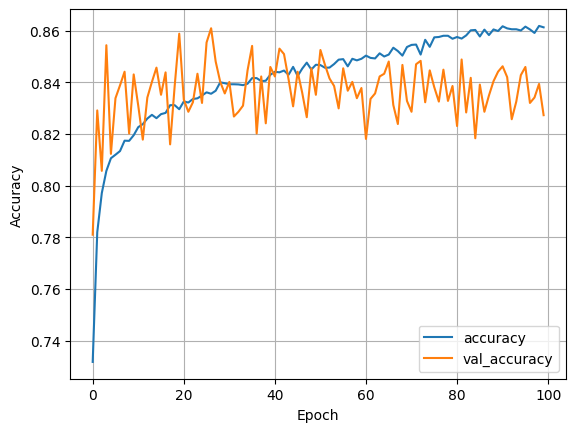

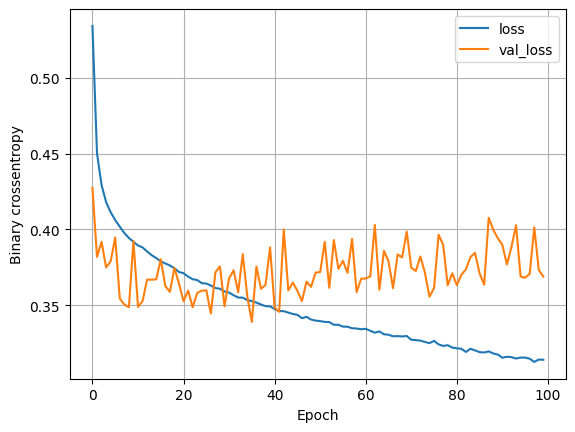

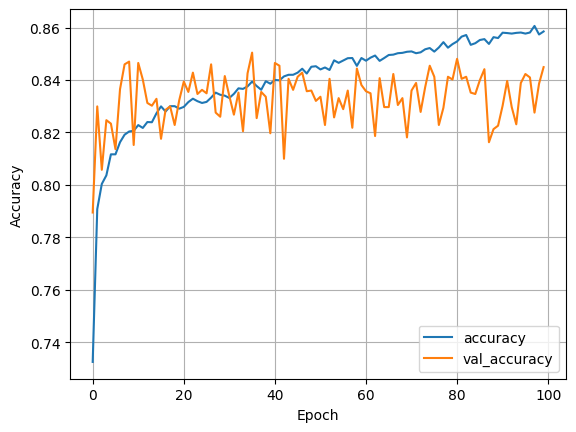

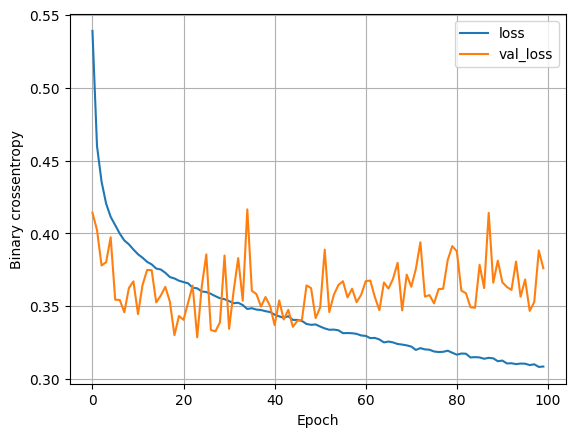

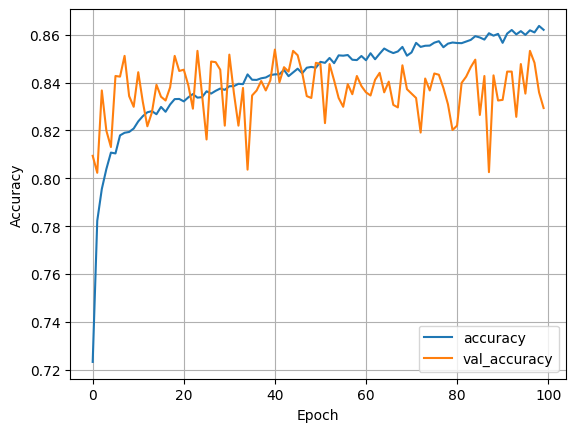

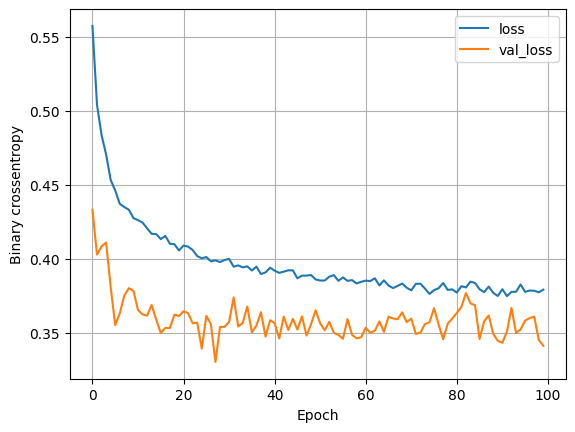

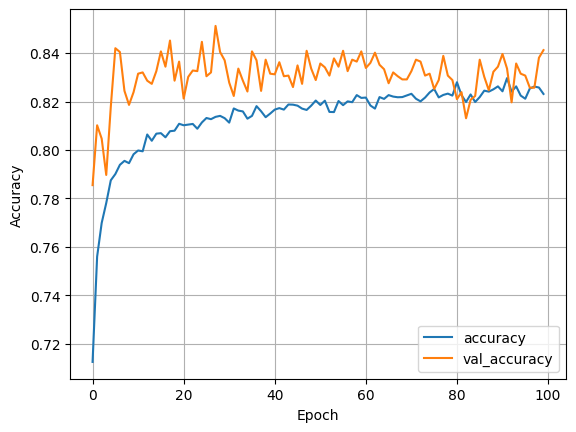

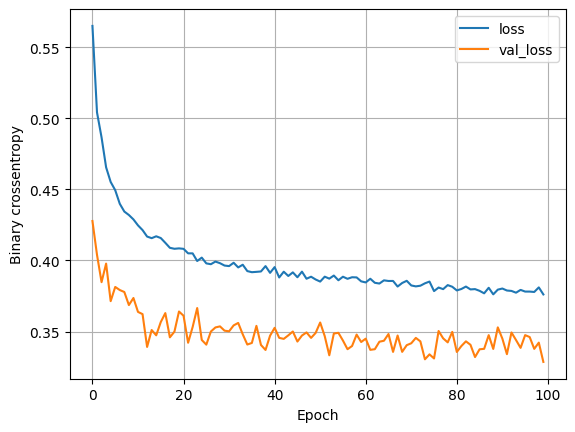

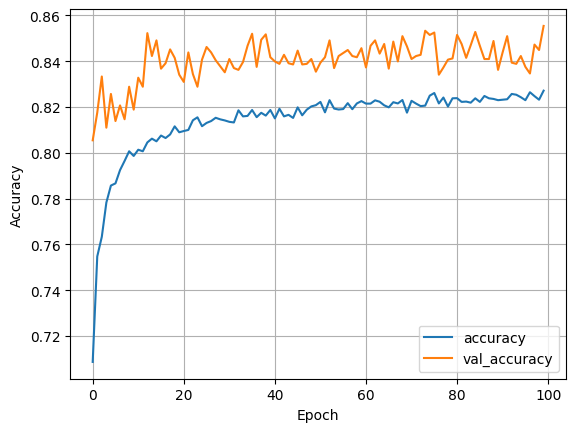

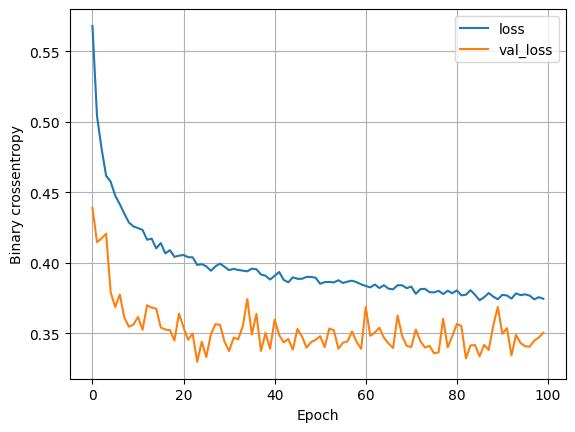

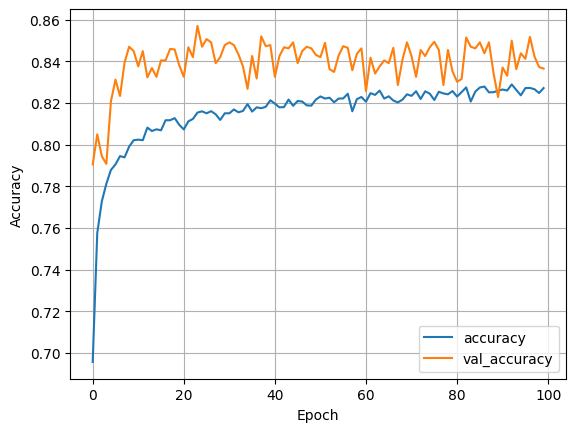

In [27]:
epochs=100
for num_nodes in [32]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32]:
        model, history = train_model(train, valid, test, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        plot_accuracy(history)